In [11]:
import yfinance as yf
symbol = "TCS.NS"
df = yf.download(symbol, period = "1mo")
csv_filename = f"{symbol}_yfinace_data.csv"
df.to_csv(csv_filename)
print(f"Data saved to {csv_filename}")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['TCS.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


Data saved to TCS.NS_yfinace_data.csv


In [3]:
pip install nsetools

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
from nsetools import Nse

nse = Nse()

symbol = "TCS"

stock_data = nse.get_quote(symbol)  

df = pd.DataFrame([stock_data])

csv_filename = f"{symbol}_nse_data.csv"
df.to_csv(csv_filename, index=False)

print(f"Data saved to {csv_filename}")


HTTPError: HTTP Error 403: Forbidden

In [2]:
import yfinance as yf
ticker = "RELIANCE.NS" 
df = yf.download(ticker, period = "6mo", interval = "1d")
df.to_csv("reliance_ns.csv")
print("data saved to reliance_ns.csv")

[*********************100%***********************]  1 of 1 completed

1 Failed download:
['RELIANCE.NS']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


data saved to reliance_ns.csv


In [4]:
from alpha_vantage.timeseries import TimeSeries
import pandas

api_key = "0PMOAD83PK5W49TE"
ts = TimeSeries(key = api_key, output_format = "pandas")
data, meta_data = ts.get_daily(symbol = "RELIANCE.BSE", outputsize = "compact")

data.to_csv("reliance_alpha.csv")
print("Data saved from alpha_vantage")

Data saved from alpha_vantage


In [84]:
import pandas as pd
import talib

input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"], errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values

input_data["SMA Weekly"] = talib.SMA(close_price_data, timeperiod=5)

latest_sma = input_data["SMA Weekly"]
latest_close_price = input_data["Close"].iloc[-1]

print(f"Latest Weekly SMA:\n{latest_sma}")
print(f"Latest Close Price:\n{latest_close_price}")

for i in latest_sma:
    if latest_close_price > i:
        print(f"Current Close Price: {latest_close_price} is Above the weekly SMA: {i}")
    elif latest_close_price < i:
        print(f"Current Close Price: {latest_close_price} is Below the weekly SMA: {i}")
    else:
        print(f"Current Close Price: {latest_close_price} is not in the weekly SMA: {i}")


Latest Weekly SMA:
128        NaN
127        NaN
126        NaN
125        NaN
124    3003.93
        ...   
4      1227.68
3      1221.93
2      1220.04
1      1222.22
0      1225.60
Name: SMA Weekly, Length: 129, dtype: float64
Latest Close Price:
1233.0
Current Close Price: 1233.0 is not in the weekly SMA: nan
Current Close Price: 1233.0 is not in the weekly SMA: nan
Current Close Price: 1233.0 is not in the weekly SMA: nan
Current Close Price: 1233.0 is not in the weekly SMA: nan
Current Close Price: 1233.0 is Below the weekly SMA: 3003.93
Current Close Price: 1233.0 is Below the weekly SMA: 3003.7799999999997
Current Close Price: 1233.0 is Below the weekly SMA: 3012.9
Current Close Price: 1233.0 is Below the weekly SMA: 3016.7599999999998
Current Close Price: 1233.0 is Below the weekly SMA: 3018.22
Current Close Price: 1233.0 is Below the weekly SMA: 3021.6899999999996
Current Close Price: 1233.0 is Below the weekly SMA: 3028.1899999999996
Current Close Price: 1233.0 is Below the 

C:\Users\Nitheesh kumar\AppData\Local\Temp\ipykernel_20184\2577121165.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  input_data["Date"] = pd.to_datetime(input_data["Date"], errors='coerce')


C:\Users\Nitheesh kumar\AppData\Local\Temp\ipykernel_20184\1435665997.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  input_data["Date"] = pd.to_datetime(input_data["Date"], errors='coerce')


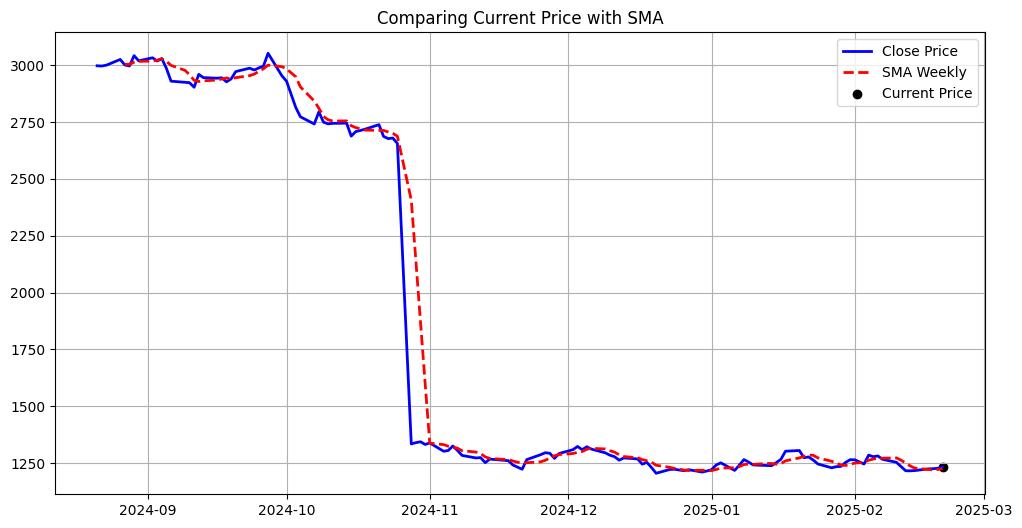

In [86]:
import pandas as pd
import talib



input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"], errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values

input_data["SMA Weekly"] = talib.SMA(close_price_data, timeperiod=5)

latest_sma = input_data["SMA Weekly"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

plt.figure(figsize=(12, 6))
plt.plot(input_data["Date"], input_data["Close"], label="Close Price", color="blue", linewidth=2)
plt.plot(input_data["Date"], input_data["SMA Weekly"], label="SMA Weekly", color="red", linestyle="dashed", linewidth=2)
plt.scatter(input_data["Date"].iloc[-1], input_data["Close"].iloc[-1], color="black", label="Current Price")
plt.title("Comparing Current Price with SMA")
plt.xlabel = "Date"
plt.ylabel = "Price"
plt.grid()
plt.legend()
plt.show()


In [85]:
import pandas as pd

input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")

input_data.rename(columns=lambda x: x.strip(), inplace=True)

if "Date" not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

print("First few dates (raw):", input_data["Date"].head(10))

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%m-%Y", errors="coerce")
input_data = input_data.dropna(subset=["Date"])

print("First few dates (converted):", input_data["Date"].head(10))

input_data = input_data.sort_values(by="Date")

print("Date parsing successful!")


First few dates (raw): 0    20-Feb-25
1    19-Feb-25
2    18-Feb-25
3    17-Feb-25
4    14-Feb-25
5    13-Feb-25
6    12-Feb-25
7    11-Feb-25
8    10-Feb-25
9     7-Feb-25
Name: Date, dtype: object
First few dates (converted): Series([], Name: Date, dtype: datetime64[ns])
Date parsing successful!


In [76]:
import pandas as pd

input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors="coerce")
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
print(input_data.head())


          Date series      OPEN      HIGH       LOW PREV. CLOSE       ltp  \
128 2024-08-21     EQ  2,986.50  3,015.75  2,980.00    2,991.90  2,999.00   
127 2024-08-22     EQ  3,006.00  3,013.00  2,981.30    2,997.35  2,996.50   
126 2024-08-23     EQ  3,007.50  3,022.65  2,996.85    2,996.25  2,996.85   
125 2024-08-26     EQ  3,013.95  3,046.00  3,006.00    2,999.95  3,021.20   
124 2024-08-27     EQ  3,021.00  3,026.95  2,998.90    3,025.20  3,001.00   

        Close      vwap     52W H     52W L     VOLUME               VALUE  \
128  2,997.35  3,001.42  3,217.60  2,220.30  38,84,998  11,66,05,26,038.60   
127  2,996.25  2,994.88  3,217.60  2,220.30  52,22,891  15,64,19,35,953.20   
126  2,999.95  3,007.21  3,217.60  2,220.30  46,24,827  13,90,78,42,193.30   
125  3,025.20  3,028.80  3,217.60  2,220.30  44,08,057  13,35,11,14,538.35   
124  3,000.90  3,008.12  3,217.60  2,220.30  31,25,578   9,40,21,08,149.05   

    No of trades  
128     1,41,353  
127     2,33,216  
126     1,6

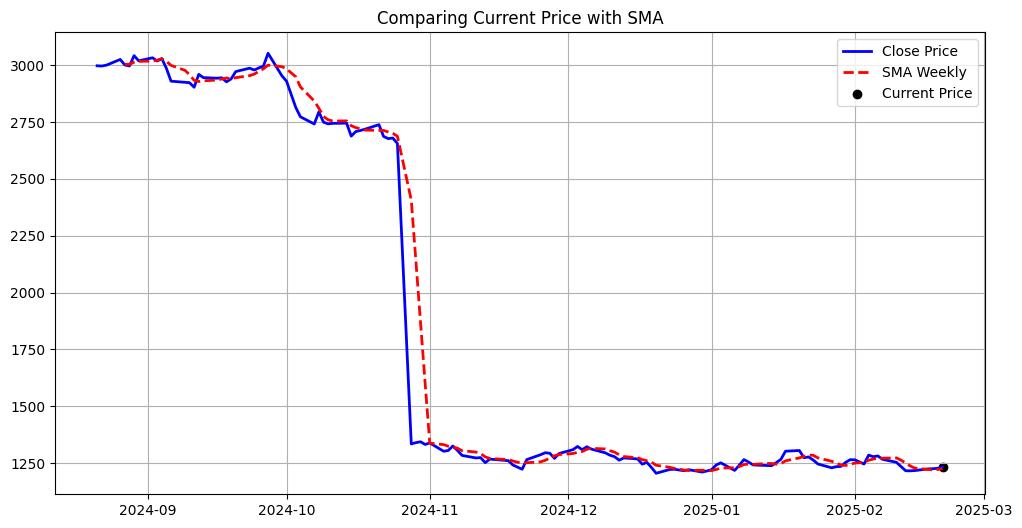

In [87]:
import pandas as pd
import talib


input_data = pd.read_csv("RELIANCE-EQ-21-08-2024-to-21-02-2025.csv", encoding="utf-8")
input_data.rename(columns=lambda x: x.strip(), inplace=True)

if 'Date' not in input_data.columns:
    raise KeyError("The 'Date' column is missing. Check column names in the CSV.")

input_data["Date"] = pd.to_datetime(input_data["Date"].astype(str).str.strip(), format="%d-%b-%y", errors='coerce')
input_data = input_data.dropna(subset=["Date"])
input_data = input_data.sort_values(by="Date")
input_data["Close"] = input_data["Close"].astype(str).str.replace(",", "").astype(float)

close_price_data = input_data["Close"].values

input_data["SMA Weekly"] = talib.SMA(close_price_data, timeperiod=5)

latest_sma = input_data["SMA Weekly"].dropna()
latest_close_price = input_data["Close"].iloc[-1]

plt.figure(figsize=(12, 6))
plt.plot(input_data["Date"], input_data["Close"], label="Close Price", color="blue", linewidth=2)
plt.plot(input_data["Date"], input_data["SMA Weekly"], label="SMA Weekly", color="red", linestyle="dashed", linewidth=2)
plt.scatter(input_data["Date"].iloc[-1], input_data["Close"].iloc[-1], color="black", label="Current Price")
plt.title("Comparing Current Price with SMA")
plt.xlabel = "Date"
plt.ylabel = "Price"
plt.grid()
plt.legend()
plt.show()
